# Importing Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

# Reading the dataset

In [133]:
df = pd.read_csv('consumption.csv', encoding_errors= 'replace', low_memory=False)
df.head()

,Model_Year,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelConsumption,Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2Emissions,CO2Rating,SmogRating
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254,4,3
2,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2020,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2020,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [134]:
# gives a summary of the dataset
df.describe()

,Model_Year,EngineSize,Cylinders,FuelConsumption,Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2Emissions,CO2Rating,SmogRating
count,968.0,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,2020.0,3.161674,5.688017,12.458368,9.151136,10.969835,27.465909,254.801653,4.487603,4.450413
std,0.0,1.352828,1.942232,3.441169,2.124258,2.808997,7.449997,60.974828,1.691836,1.768277
min,2020.0,1.000000,3.000000,4.200000,4.000000,4.100000,12.000000,96.000000,1.000000,1.000000
25%,2020.0,2.000000,4.000000,10.100000,7.700000,9.100000,23.000000,213.000000,3.000000,3.000000
50%,2020.0,3.000000,6.000000,12.100000,8.900000,10.700000,26.000000,252.000000,4.000000,5.000000
75%,2020.0,3.800000,6.000000,14.300000,10.400000,12.500000,31.000000,290.250000,5.000000,6.000000
max,2020.0,8.000000,16.000000,28.100000,18.100000,23.000000,69.000000,537.000000,10.000000,7.000000


In [135]:
bdf = df[['EngineSize', 'Cylinders', 'FuelConsumption', 'CO2Emissions']]
bdf.head(9)

,EngineSize,Cylinders,FuelConsumption,CO2Emissions
0,2.4,4,9.9,199
1,3.5,6,12.3,254
2,3.5,6,12.2,258
3,3.0,6,9.1,210
4,3.5,6,11.1,261
5,2.0,4,11.0,232
6,2.0,4,11.3,241
7,3.5,6,8.4,196
8,2.4,4,10.2,209


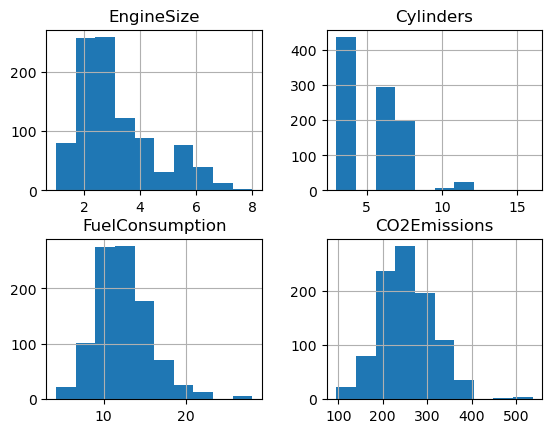

In [136]:
viz = bdf[['EngineSize', 'Cylinders', 'FuelConsumption', 'CO2Emissions']]
viz.hist()
plt.show()

# Plotting each of these features against the Emission, to see how linear their relationship is

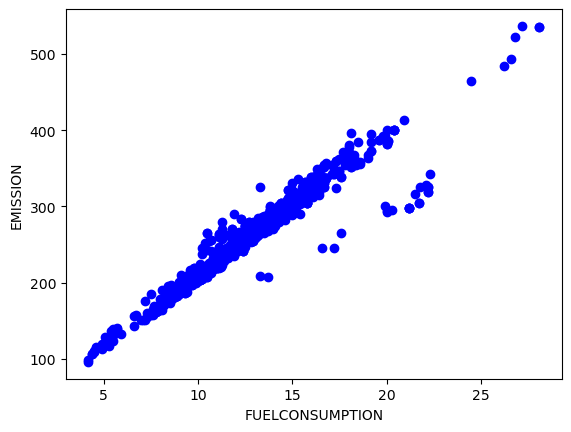

In [137]:
plt.scatter(bdf.FuelConsumption, bdf.CO2Emissions, color = 'blue')
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("EMISSION")
plt.show()

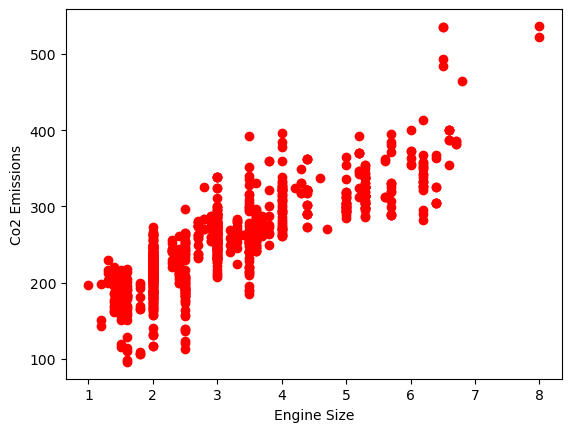

In [138]:
plt.scatter(bdf.EngineSize, bdf.CO2Emissions, color = 'red')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

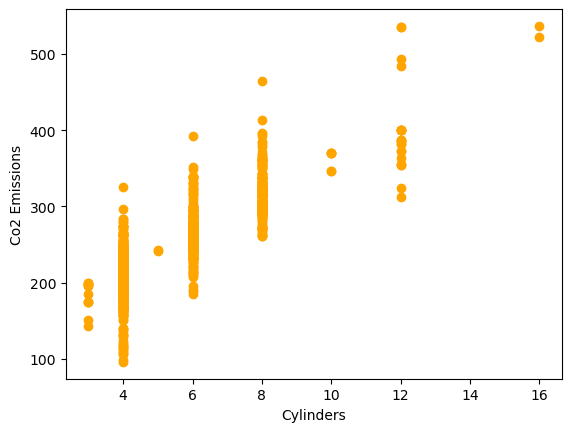

In [139]:
plt.scatter(bdf.Cylinders, bdf.CO2Emissions, color = 'orange')
plt.xlabel('Cylinders')
plt.ylabel('Co2 Emissions')
plt.show()

# Splitting the dataset into train/test datasets

In [140]:
len(bdf)

968

# Method One

In [141]:
#train dataset.
#using a mask to select random rows
mask = np.random.rand(len(bdf)) < 0.8
train = bdf[mask]
test = bdf[~mask]

In [142]:
len(train)

760

In [143]:
len(test)

208

# Method Two (train data distribution doesn't work)

In [60]:
# #Train dataset
# trainSize = 0.8
# trainDS = len(df)*trainSize

In [70]:
# trainDS

In [50]:
# #Test Dataset
# testSize = 0.2
# testDS = len(df)*testSize

In [71]:
# testDS

# Train Data Distribution

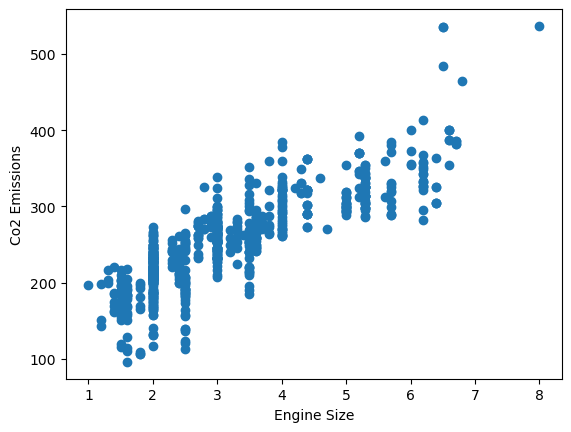

In [144]:
plt.scatter(train.EngineSize, train.CO2Emissions)
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

# Regression model of EngineSize and CO2Emissions

In [145]:
# getting rid of infinite values if any because sklearn cannot work with NaN, infinite or very large values.
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [153]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
trainx = np.asanyarray(train[['EngineSize']])
trainy = np.asanyarray(train[['CO2Emissions']])
regr.fit(trainx, trainy)
# the co-efficients
print('Coefficients: ',regr.coef_)
print('Intercept: ',regr.intercept_)

# the co-efficents and intercept are the values of the fit line. Remember the fit line is in the form of y=mx+c,
# m being the slope/co-efficient of the line and y being the intercept.Sklearn is a library we can use to find these values.

Coefficients:  [[37.7493483]]
Intercept:  [134.49986408]


# Plotting the fit line

Text(0, 0.5, 'Emissions')

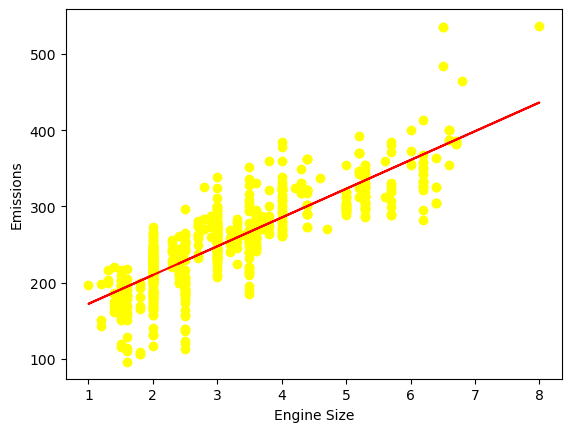

In [150]:
plt.scatter(train.EngineSize, train.CO2Emissions, color = 'yellow')
# notice the parameters below match the form y=mx+c
plt.plot(trainx, regr.coef_[0][0]*trainx + regr.intercept_[0], '-r') 
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

# Model evaluation using Mean Squared Error

In [ ]:
# We will use R-squared. It's a metric to tell how close the data points are to the fit line.
# The higher the value of r-squared the more accurate the fit line. Highest score is 1.0

In [163]:
from sklearn.metrics import r2_score

testx = np.asanyarray(test[['EngineSize']])
testy = np.asanyarray(test[['CO2Emissions']])

testy = regr.predict(testx)

print('Mean Absolute Error : %.2f' % np.mean(np.absolute(testy - testy)))
print('Residual sum of squares (MSE): %.2f' % np.mean((testx - testy)** 2))
print('R2-score: %.2f' % r2_score(testy, testy))
# the % after the string literal is used for string interpolation

Mean Absolute Error : 0.00
Residual sum of squares (MSE): 8994.63
R2-score: 1.00


# Regression model of FuelConsumption and CO2Emissions

In [ ]:
# getting rid of infinite values if any because sklearn cannot work with NaN, infinite or very large values.
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [159]:
regr2 = linear_model.LinearRegression()
trainx2 = np.asanyarray(train[['FuelConsumption']])
trainy2 = np.asanyarray(train[['CO2Emissions']])
regr2.fit(trainx2, trainy2)

# the co-efficients
print('Coefficients: ',regr2.coef_)
print('Intercept: ',regr2.intercept_)

Coefficients:  [[17.08155097]]
Intercept:  [42.22426594]


# Plotting the fit line

Text(0, 0.5, 'Emissions')

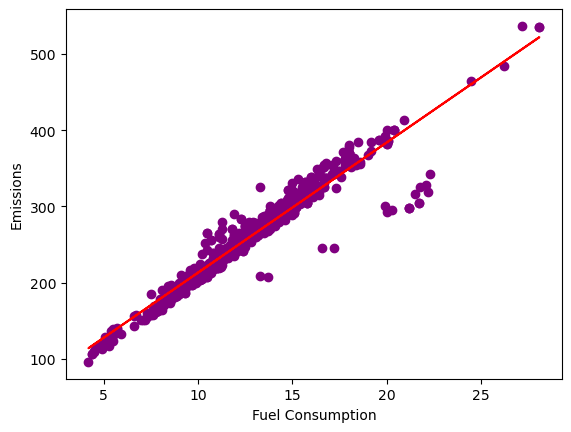

In [160]:
plt.scatter(train.FuelConsumption, train.CO2Emissions, color = 'purple')
plt.plot(trainx2, regr.coef_[0][0]*trainx2 + regr.intercept_[0], '-r') 
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')

# Model evaluation using Mean Squared Error

In [164]:
testx2 = np.asanyarray(test[['FuelConsumption']])
testy2 = np.asanyarray(test[['CO2Emissions']])

testy2 = regr2.predict(testx2)

print('Mean Absolute Error : %.2f' % np.mean(np.absolute(testy2 - testy2)))
print('Residual sum of squares (MSE): %.2f' % np.mean((testx2 - testy2)** 2))
print('R2-score: %.2f' % r2_score(testy2, testy2))

Mean Absolute Error : 0.00
Residual sum of squares (MSE): 63263.50
R2-score: 1.00


# Regression model of cylinders and CO2Emissions

In [ ]:
# getting rid of infinite values if any because sklearn cannot work with NaN, infinite or very large values.
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [166]:
regr3 = linear_model.LinearRegression()
trainx3 = np.asanyarray(train[['Cylinders']])
trainy3 = np.asanyarray(train[['CO2Emissions']])
regr3.fit(trainx3, trainy3)

print('Coefficients: ',regr3.coef_)
print('Intercept: ',regr3.intercept_)

Coefficients:  [[26.08700821]]
Intercept:  [105.62785192]


# Plotting the fit line

Text(0, 0.5, 'CO2Emissions')

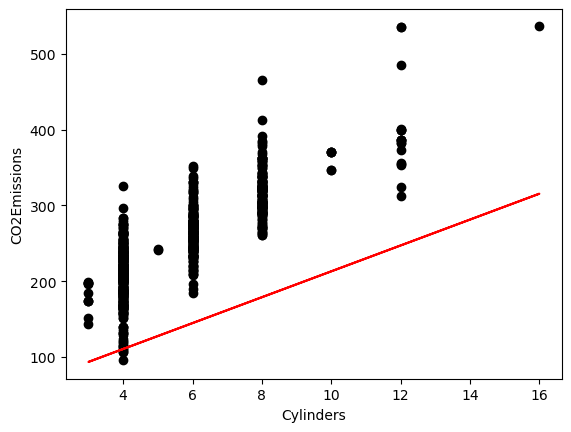

In [169]:
plt.scatter(train.Cylinders, train.CO2Emissions, color = 'black')
plt.plot(trainx3, regr.coef_[0][0]*trainx3 + regr.intercept_[0], '-r')
plt.xlabel('Cylinders')
plt.ylabel('CO2Emissions')

# Evaluation using MSE

In [172]:
testx3 = np.asanyarray(test[['FuelConsumption']])
testy3 = np.asanyarray(test[['CO2Emissions']])

testy3 = regr3.predict(testx3)

print('Mean Absolute Error : %.2f' % np.mean(np.absolute(testy3 - testy3)))
print('Residual sum of squares (MSE): %.2f' % np.mean((testx3 - testy3)** 2))
print('R2-score: %.2f' % r2_score(testy3, testy3))

Mean Absolute Error : 0.00
Residual sum of squares (MSE): 185943.52
R2-score: 1.00


# The End...